In [7]:
import csv

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [8]:
df = pd.read_csv(r'C:\Users\ACER-PC\Desktop\Z\csvs\melb_data.csv')
df.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [12]:
# check the datatypes
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

<AxesSubplot:>

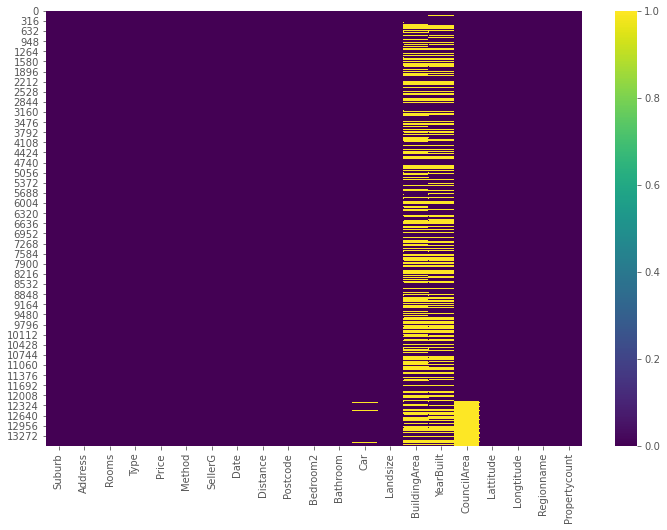

In [10]:
#checking for nulls using heatmap
sns.heatmap(df.isnull(), cmap='viridis')

In [13]:
#delete columns
del df['BuildingArea']
del df['YearBuilt']

In [15]:
new_df = df

<AxesSubplot:>

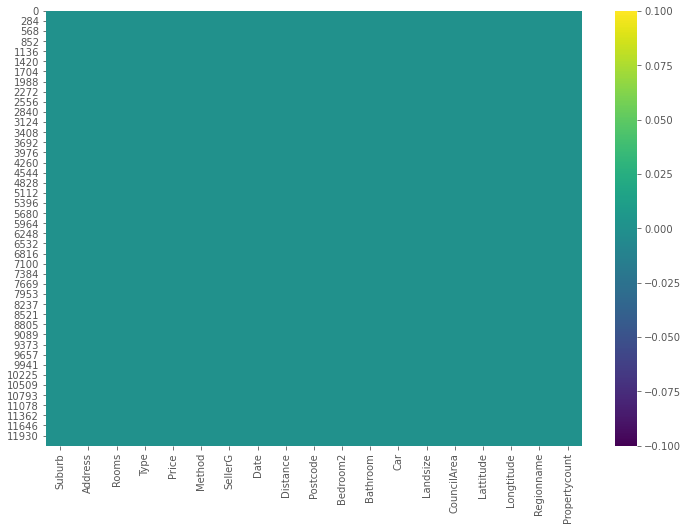

In [20]:
sns.heatmap(new_df.isnull(), cmap='viridis')

In [19]:
#drop rows with Nan value
new_df = df.dropna(subset=['CouncilArea'])
new_df = df.dropna(subset=['Car'])

In [54]:
#delete column
del new_df['Method']

In [ ]:
new_df.head()

In [55]:
df = new_df
df.dtypes

Suburb             int16
Address            int16
Rooms              int64
Price              int64
SellerG            int16
Date                int8
Distance         float64
Postcode         float64
Bedroom2           int64
Bathroom           int64
Car                int64
Landsize           int64
CouncilArea         int8
Lattitude        float64
Longtitude       float64
Regionname          int8
Propertycount      int64
Year                int8
dtype: object

In [35]:
#change the datatypes into a more appropriate type (float to int)

df['Price'] = df['Price'].astype('int64')

df['Bathroom'] = df['Bathroom'].astype('int64')

new_df['Car'] = df['Car'].astype('int64')

new_df['Bedroom2'] = df['Bedroom2'].astype('int64')

new_df['Landsize'] = df['Landsize'].astype('int64')

new_df['Propertycount'] = df['Propertycount'].astype('int64')


In [ ]:
#Distinct count
df['Regionname'].drop_duplicates().sort_index(ascending=True) 

In [ ]:
#sort the table with Price column

df = df.sort_values(by=['Price'], inplace=False, ascending=False)

In [62]:
# to display all the results on the screen

pd.set_option('display.max_rows', 30)

In [39]:
df.head()

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year
0,Abbotsford,85 Turner St,2,1480000,S,Biggin,3/12/2016,2.5,3067.0,2,1,1,202,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,2016
1,Abbotsford,25 Bloomburg St,2,1035000,S,Biggin,4/02/2016,2.5,3067.0,2,1,0,156,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,2016
2,Abbotsford,5 Charles St,3,1465000,SP,Biggin,4/03/2017,2.5,3067.0,3,2,0,134,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,2017
3,Abbotsford,40 Federation La,3,850000,PI,Biggin,4/03/2017,2.5,3067.0,3,2,1,94,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,2017
4,Abbotsford,55a Park St,4,1600000,VB,Nelson,4/06/2016,2.5,3067.0,3,1,2,120,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,2016


In [38]:
#change the object type and get the last four digits of the date
df['Year'] = df['Date'].astype(str).str[-4:]

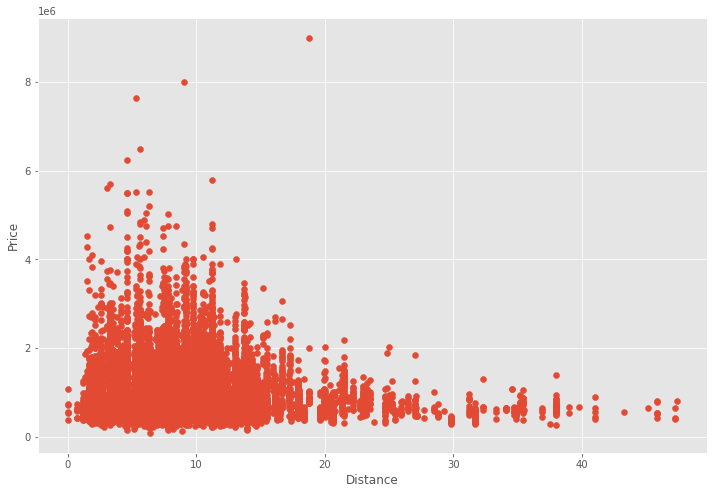

In [40]:
# Use a scatter plot to verify the correlation

plt.scatter(x=df['Distance'], y=df['Price'])

plt.xlabel('Distance')

plt.ylabel('Price')

plt.show()

<AxesSubplot:xlabel='Distance', ylabel='Price'>

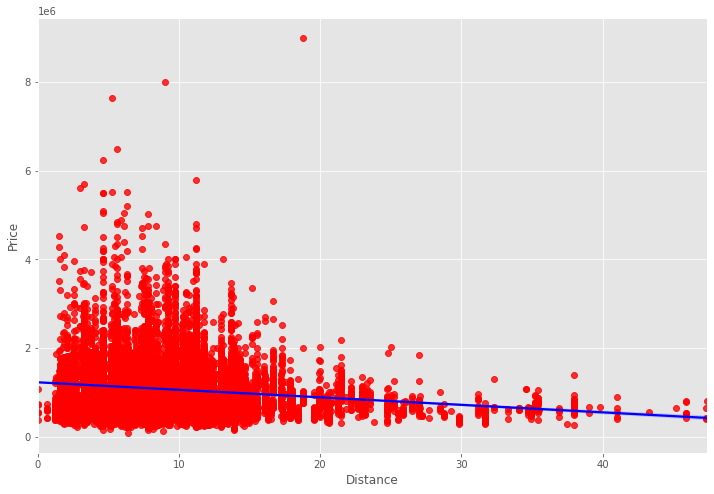

In [41]:
#Using seaborn to plot distance against price

sns.regplot(x='Distance', y='Price', data=df, scatter_kws={'color':'Red'}, line_kws={'color':'Blue'})


In [42]:
#checking correlation_matrix
# 3 types of correlation (method='pearson', 'kendall', 'spearman')

df.corr(method='pearson')

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.510522,0.291880,0.041216,0.938638,0.590537,0.410980,0.022871,0.023152,0.090677,-0.090703
Price,0.510522,1.000000,-0.146137,0.118202,0.487402,0.473933,0.248628,0.038536,-0.207404,0.201424,-0.037167
Distance,0.291880,-0.146137,1.000000,0.407168,0.293049,0.124433,0.269406,0.016920,-0.134977,0.249663,-0.078204
Postcode,0.041216,0.118202,0.407168,1.000000,0.046785,0.108269,0.045136,0.021272,-0.459353,0.484337,0.069350
Bedroom2,0.938638,0.487402,0.293049,0.046785,1.000000,0.581431,0.406855,0.022789,0.022887,0.091896,-0.090551
Bathroom,0.590537,0.473933,0.124433,0.108269,0.581431,1.000000,0.329498,0.035098,-0.070462,0.114611,-0.051937
Car,0.410980,0.248628,0.269406,0.045136,0.406855,0.329498,1.000000,0.023335,0.005596,0.057456,-0.029895
Landsize,0.022871,0.038536,0.016920,0.021272,0.022789,0.035098,0.023335,1.000000,0.005772,0.014761,-0.005522
Lattitude,0.023152,-0.207404,-0.134977,-0.459353,0.022887,-0.070462,0.005596,0.005772,1.000000,-0.350324,0.042171
Longtitude,0.090677,0.201424,0.249663,0.484337,0.091896,0.114611,0.057456,0.014761,-0.350324,1.000000,0.083635


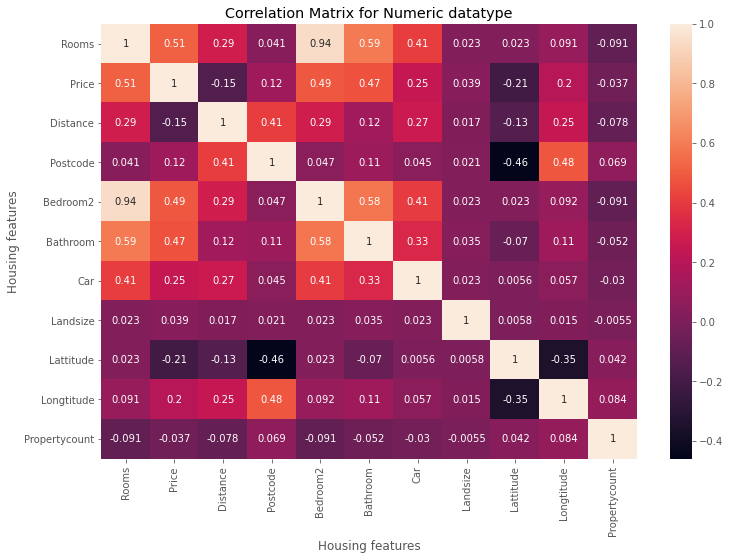

In [45]:
#Visualising the correlation

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric datatype')

plt.xlabel('Housing features')

plt.ylabel('Housing features')

plt.show()

In [ ]:
#del df['Address']

#df['Regionname'].drop_duplicates().sort_values(ascending=False)

In [56]:
df.sort_values(by=['Price'], ascending=False, inplace=False)

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year
12094,205,7180,3,9000000,84,37,18.8,3170.0,3,1,1,744,20,-37.93168,145.16126,4,7113,1
7692,58,8765,5,8000000,205,8,9.0,3126.0,5,5,4,2079,2,-37.81790,145.06940,5,3265,1
9575,145,8763,4,7650000,2,15,5.3,3122.0,4,2,4,1690,2,-37.82652,145.03052,5,11308,1
3616,168,2617,6,6500000,102,9,5.6,3101.0,6,6,3,1334,2,-37.80290,145.02670,5,10331,0
6372,278,3081,3,6250000,106,12,4.6,3142.0,3,3,2,564,26,-37.84860,145.02440,5,7217,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7940,145,3204,1,160000,83,49,4.6,3122.0,1,1,0,322,2,-37.81980,145.03730,5,11308,1
7303,5,11376,1,145000,22,34,13.9,3020.0,2,1,1,36,3,-37.78330,144.82660,6,2185,0
1927,78,3234,4,145000,102,44,7.8,3058.0,3,1,1,536,23,-37.75550,144.96580,2,11204,0
1805,65,6687,4,131000,195,28,8.9,3162.0,4,1,2,499,8,-37.88640,145.02420,5,2379,1


In [57]:
#converting objects into numbers for easy computation

df_numerics = df

for col_name in df_numerics.columns:
    if(df_numerics[col_name].dtypes == 'object'):
        df_numerics[col_name] = df_numerics[col_name].astype('category')
        df_numerics[col_name] = df_numerics[col_name].cat.codes

df_numerics.head()


,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year
0,0,11527,2,1480000,22,40,2.5,3067.0,2,1,1,202,31,-37.7996,144.9984,2,4019,0
1,0,5374,2,1035000,22,42,2.5,3067.0,2,1,0,156,31,-37.8079,144.9934,2,4019,0
2,0,8847,3,1465000,22,43,2.5,3067.0,3,2,0,134,31,-37.8093,144.9944,2,4019,1
3,0,8114,3,850000,22,43,2.5,3067.0,3,2,1,94,31,-37.7969,144.9969,2,4019,1
4,0,9554,4,1600000,146,44,2.5,3067.0,3,1,2,120,31,-37.8072,144.9941,2,4019,0


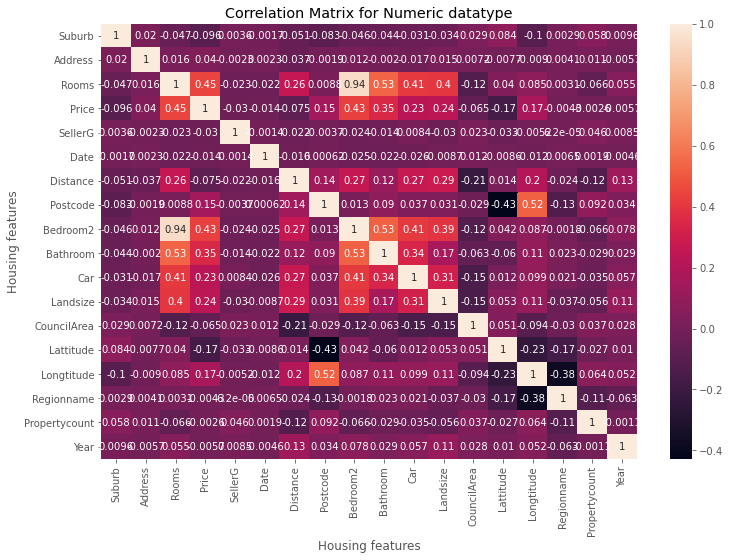

In [58]:
#View the newly converted objects using seaborn matrix correlation matrix

correlation_matrix = df_numerics.corr(method='kendall')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric datatype')

plt.xlabel('Housing features')

plt.ylabel('Housing features')

plt.show()

In [59]:
df_numerics.corr()

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year
Suburb,1.000000,0.028783,-0.067124,-0.134748,0.019121,-0.002874,-0.052123,-0.072644,-0.066067,-0.061926,-0.029855,0.000886,0.043310,0.140995,-0.143904,-0.013640,0.143866,0.013334
Address,0.028783,1.000000,0.021013,0.053268,-0.001675,0.003272,-0.039074,0.004317,0.015883,0.005761,-0.019246,0.003203,0.010788,-0.011954,-0.005382,0.006739,0.012893,-0.007011
Rooms,-0.067124,0.021013,1.000000,0.510522,-0.030742,-0.032926,0.291880,0.041216,0.938638,0.590537,0.410980,0.022871,-0.151009,0.023152,0.090677,-0.017003,-0.090703,0.054608
Price,-0.134748,0.053268,0.510522,1.000000,-0.043666,-0.028078,-0.146137,0.118202,0.487402,0.473933,0.248628,0.038536,-0.112750,-0.207404,0.201424,0.077609,-0.037167,-0.015057
SellerG,0.019121,-0.001675,-0.030742,-0.043666,1.000000,0.000906,-0.004648,0.008130,-0.030010,-0.018984,0.014954,-0.003251,0.021415,-0.045420,-0.027905,0.030094,0.053880,0.012042
Date,-0.002874,0.003272,-0.032926,-0.028078,0.000906,1.000000,-0.028405,-0.006026,-0.034596,-0.032527,-0.031744,-0.008057,0.016481,-0.009435,-0.014192,0.011331,0.000077,0.000029
Distance,-0.052123,-0.039074,0.291880,-0.146137,-0.004648,-0.028405,1.000000,0.407168,0.293049,0.124433,0.269406,0.016920,-0.235676,-0.134977,0.249663,-0.079587,-0.078204,0.224905
Postcode,-0.072644,0.004317,0.041216,0.118202,0.008130,-0.006026,0.407168,1.000000,0.046785,0.108269,0.045136,0.021272,-0.040047,-0.459353,0.484337,-0.003830,0.069350,0.090536
Bedroom2,-0.066067,0.015883,0.938638,0.487402,-0.030010,-0.034596,0.293049,0.046785,1.000000,0.581431,0.406855,0.022789,-0.143988,0.022887,0.091896,-0.023136,-0.090551,0.075773
Bathroom,-0.061926,0.005761,0.590537,0.473933,-0.018984,-0.032527,0.124433,0.108269,0.581431,1.000000,0.329498,0.035098,-0.086091,-0.070462,0.114611,0.032609,-0.051937,0.020523


In [60]:
#pairing the correlated pairs

correlation_mat = df_numerics.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

Suburb  Suburb           1.000000
        Address          0.028783
        Rooms           -0.067124
        Price           -0.134748
        SellerG          0.019121
                           ...   
Year    Lattitude       -0.001639
        Longtitude       0.062184
        Regionname      -0.076410
        Propertycount   -0.004294
        Year             1.000000
Length: 324, dtype: float64

In [65]:
#sorting the values from highest to lowest
sorted_pairs = corr_pairs.sort_values(ascending=False)

sorted_pairs

Suburb      Suburb        1.000000
Bathroom    Bathroom      1.000000
Price       Price         1.000000
SellerG     SellerG       1.000000
Date        Date          1.000000
                            ...   
Longtitude  Lattitude    -0.350324
            Regionname   -0.458394
Regionname  Longtitude   -0.458394
Lattitude   Postcode     -0.459353
Postcode    Lattitude    -0.459353
Length: 324, dtype: float64

In [68]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5].sort_values()

high_corr

Price          Rooms            0.510522
Rooms          Price            0.510522
Bathroom       Bedroom2         0.581431
Bedroom2       Bathroom         0.581431
Bathroom       Rooms            0.590537
Rooms          Bathroom         0.590537
Bedroom2       Rooms            0.938638
Rooms          Bedroom2         0.938638
Year           Year             1.000000
Rooms          Rooms            1.000000
Propertycount  Propertycount    1.000000
Regionname     Regionname       1.000000
Longtitude     Longtitude       1.000000
Suburb         Suburb           1.000000
Landsize       Landsize         1.000000
Address        Address          1.000000
Car            Car              1.000000
Bedroom2       Bedroom2         1.000000
Postcode       Postcode         1.000000
Distance       Distance         1.000000
Date           Date             1.000000
SellerG        SellerG          1.000000
Price          Price            1.000000
Bathroom       Bathroom         1.000000
CouncilArea    C